# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# PreProcessing

In [2]:
df = pd.read_csv('D:\Data Science - Rakamin\Portofolio\Mini Project 2 - Investigate Hotel Business using Data Visualization\hotel_bookings_data.csv')
pd.set_option('display.max_columns', None)
df.shape

(119390, 29)

In [3]:
df1 = df.copy()

Terdapat 29 kolom dan 119390 baris data dalam database

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [6]:
# check if there is null values
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [7]:
# check unique values
cats = ['hotel','arrival_date_month','meal','city','market_segment','distribution_channel','deposit_type','customer_type','reservation_status']
for i in cats:
    print(i, df[i].unique())

hotel ['Resort Hotel' 'City Hotel']
arrival_date_month ['September' 'October' 'November' 'December' 'January' 'February' 'March'
 'April' 'May' 'June' 'July' 'August']
meal ['Breakfast' 'Full Board' 'Dinner' 'No Meal' 'Undefined']
city ['Kota Denpasar' 'Kabupaten Bangka' 'Kabupaten Sleman' 'Kota Batu'
 'Kota Malang' 'Kota Yogyakarta' nan 'Kabupaten Tangerang' 'Kota Semarang'
 'Kota Serang' 'Kota Tangerang' 'Kota Bogor' 'Kabupaten Bandung'
 'Kabupaten Magelang' 'Kabupaten Sumedang' 'Kota Jakarta Timur'
 'Kabupaten Purwakarta' 'Kabupaten Kepulauan Seribu' 'Kabupaten Belitung'
 'Kota Jakarta Pusat' 'Kota Jakarta Selatan' 'Kota Surabaya'
 'Kota Jakarta Utara' 'Kota Gorontalo' 'Kota Jambi' 'Kota Jakarta Barat'
 'Kota Bengkulu' 'Kabupaten Bandung Barat' 'Kabupaten Bekasi'
 'Kabupaten Bogor' 'Kabupaten Ciamis' 'Kabupaten Cianjur'
 'Kabupaten Cirebon' 'Kota Cimahi' 'Kabupaten Indramayu'
 'Kabupaten Karawang' 'Kabupaten Kuningan' 'Kabupaten Majalengka'
 'Kabupaten Serang' 'Kota Pangkal Pinang' 

Pada kolom meal terdapat 2 kategori yang memiliki arti sama, yaitu `No Meal` dan `Undefined`

In [8]:
# fill the null values
df['children'] = df['children'].fillna(0)
df['city'] = df['city'].fillna('Unknown')
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

# replace the incorrect values
df['meal'] = df['meal'].str.replace('Undefined','No Meal')

In [9]:
# create a new feature for guest number
df['guest'] = df['adults'] + df['children'] + df['babies']

In [10]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0


In [11]:
df['guest'].unique()

array([ 2.,  1.,  3.,  4.,  5., 12., 40., 26., 50., 27., 55.,  0., 20.,
        6., 10.])

In [12]:
# delete total guest < 1
df.drop(df[df['guest']<1].index, inplace=True)

In [13]:
df.shape

(119210, 30)

# Data Visualization

In [14]:
print(df['arrival_date_year'].unique())
print(df['arrival_date_month'].unique())

[2017 2018 2019]
['September' 'October' 'November' 'December' 'January' 'February' 'March'
 'April' 'May' 'June' 'July' 'August']


## Favorite hotel type

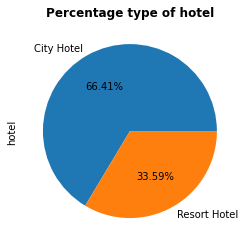

In [15]:
fig = plt.figure()
fig.patch.set_facecolor('white')
df['hotel'].value_counts().plot.pie(autopct='%1.2f%%');
plt.title('Percentage type of hotel', fontweight='bold');

In [16]:
booking_per_month = df.groupby(['hotel','arrival_date_month']).agg({'arrival_date_year':'nunique','guest':'count'}).reset_index()
booking_per_month.columns = ['hotel_type','arrival_month','nunique_year','total_booked']
booking_per_month['avg_booked'] = round(booking_per_month['total_booked']/booking_per_month['nunique_year'])

In [17]:
sort_month = ['January','February','March','April','May','June','July','August','September','October','November','December']
booking_per_month.index = pd.CategoricalIndex(booking_per_month['arrival_month'], categories=sort_month, ordered=True)
booking_per_month = booking_per_month.sort_index().reset_index(drop=True)
booking_per_month

,hotel_type,arrival_month,nunique_year,total_booked,avg_booked
0,City Hotel,January,2,4336,2168.0
1,Resort Hotel,January,2,2435,1218.0
2,City Hotel,February,2,4114,2057.0
3,Resort Hotel,February,2,2645,1322.0
4,City Hotel,March,2,3730,1865.0
5,Resort Hotel,March,2,2191,1096.0
6,City Hotel,April,2,4950,2475.0
7,Resort Hotel,April,2,3102,1551.0
8,Resort Hotel,May,2,3334,1667.0
9,City Hotel,May,2,6434,3217.0


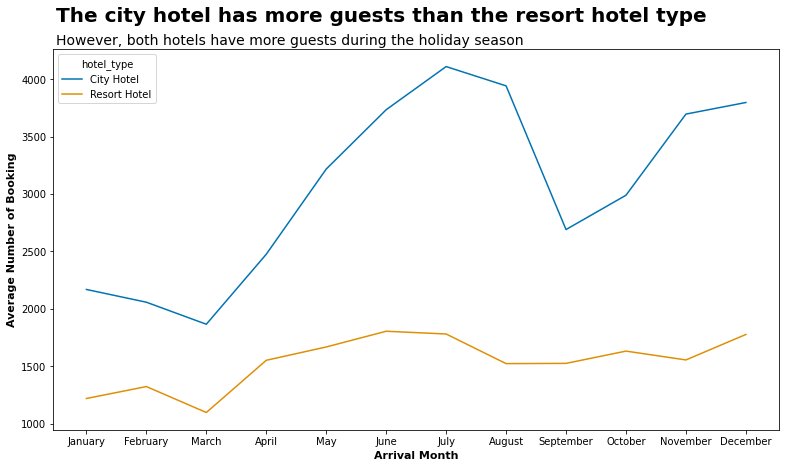

In [18]:
fig = plt.figure(figsize=(13,7))
fig.patch.set_facecolor('white')
sns.lineplot(x='arrival_month',y='avg_booked',hue='hotel_type',data=booking_per_month,palette='colorblind');

plt.xlabel('Arrival Month', fontsize=11, fontweight='bold')
plt.ylabel('Average Number of Booking', fontsize=11, fontweight='bold')
plt.text(x=-0.5, y=4500, s='The city hotel has more guests than the resort hotel type', fontsize=20, fontweight='bold');
plt.text(x=-0.5, y=4300, s='However, both hotels have more guests during the holiday season', fontsize=14);

## Relationship between stay duration and hotel booking cancellation rate

In [19]:
df['total_stays_nights'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
df.drop(df[(df['total_stays_nights'] < 1)].index, inplace=True)

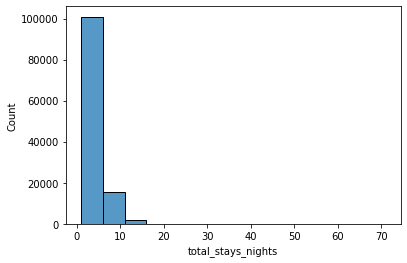

In [20]:
fig = plt.figure()
fig.patch.set_facecolor('white')
sns.histplot(x=df['total_stays_nights'], binwidth=5);

In [21]:
df['group_stays_nights'] = np.where(df['total_stays_nights'] > 14, 15, df['total_stays_nights'])

In [22]:
group_night = df.groupby(['hotel','group_stays_nights','is_canceled']).agg({'guest':'count'}).reset_index()
group_night_new = group_night.pivot_table(index=['hotel','group_stays_nights'], columns='is_canceled', values='guest').reset_index()
group_night_new['cancel_percent'] = round((group_night_new[1]/(group_night_new[0]+group_night_new[1]))*100,2)
group_night_new

is_canceled,hotel,group_stays_nights,0,1,cancel_percent
0,City Hotel,1,9155,4103,30.95
1,City Hotel,2,10983,10432,48.71
2,City Hotel,3,11889,9482,44.37
3,City Hotel,4,7694,4853,38.68
4,City Hotel,5,3210,1775,35.61
5,City Hotel,6,1111,938,45.78
6,City Hotel,7,1245,808,39.36
7,City Hotel,8,205,176,46.19
8,City Hotel,9,119,93,43.87
9,City Hotel,10,80,116,59.18


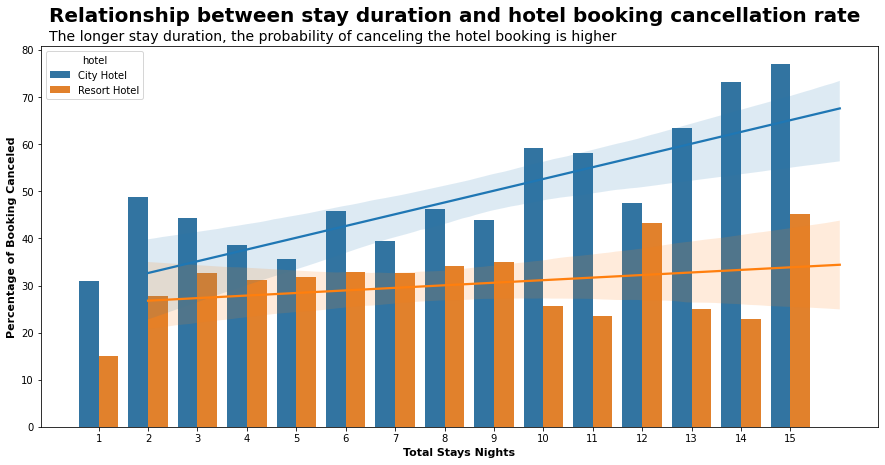

In [23]:
fig = plt.figure(figsize=(15,7))
fig.patch.set_facecolor('white')
sns.barplot(x='group_stays_nights', y='cancel_percent', data=group_night_new, hue='hotel');
sns.regplot(x='group_stays_nights', y='cancel_percent', data=group_night_new[group_night_new['hotel'] == 'City Hotel'], scatter=False);
sns.regplot(x='group_stays_nights', y='cancel_percent', data=group_night_new[group_night_new['hotel'] == 'Resort Hotel'], scatter=False);

plt.xlabel('Total Stays Nights', fontsize=11, fontweight='bold')
plt.ylabel('Percentage of Booking Canceled', fontsize=11, fontweight='bold')
plt.text(x=-1, y=86, s='Relationship between stay duration and hotel booking cancellation rate', fontsize=20, fontweight='bold');
plt.text(x=-1, y=82, s='The longer stay duration, the probability of canceling the hotel booking is higher', fontsize=14);

## Relationship between lead time and hotel booking cancellation rate

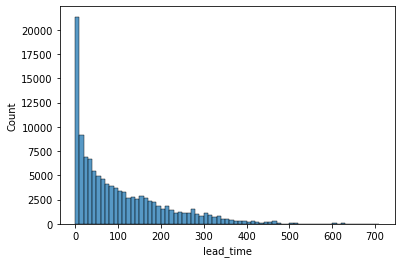

In [24]:
fig = plt.figure()
fig.patch.set_facecolor('white')
sns.histplot(x=df['lead_time'], binwidth=10);

In [25]:
def group_lead_time(x):
    if x['lead_time'] >= 0 and x['lead_time'] < 31: #month 1
        lead_time = '0-30'
    elif x['lead_time'] >= 31 and x['lead_time'] < 61: #month 2
        lead_time = '31-60'
    elif x['lead_time'] >= 61 and x['lead_time'] < 91: #month 3
        lead_time = '61-90'
    elif x['lead_time'] >= 91 and x['lead_time'] < 121: #month 4
        lead_time = '91-120'
    elif x['lead_time'] >= 121 and x['lead_time'] < 151: #month 5
        lead_time = '121-150'
    elif x['lead_time'] >= 151 and x['lead_time'] < 181: #month 6
        lead_time = '151-180'
    elif x['lead_time'] >= 181 and x['lead_time'] < 211: #month 7
        lead_time = '181-210'
    elif x['lead_time'] >= 211 and x['lead_time'] < 241: #month 8
        lead_time = '211-240'
    elif x['lead_time'] >= 241 and x['lead_time'] < 271: #month 9
        lead_time = '241-270'
    elif x['lead_time'] >= 271 and x['lead_time'] < 301: #month 10
        lead_time = '271-300'
    elif x['lead_time'] >= 301 and x['lead_time'] < 331: #month 11
        lead_time = '301-330'
    elif x['lead_time'] >= 331 and x['lead_time'] < 361: #month 12
        lead_time = '331-360'
    elif x['lead_time'] >= 361 and x['lead_time'] < 391: #month 13
        lead_time = '361-390'
    else:
        lead_time = '>390'
    return lead_time

In [26]:
df['lead_time_group'] = df.apply(lambda x: group_lead_time(x), axis=1)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest,total_stays_nights,group_stays_nights,lead_time_group
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1,1,0-30
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1,1,0-30
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0,2,2,0-30
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0,2,2,0-30
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,107.0,0,0,Check-Out,2.0,2,2,0-30


In [27]:
lead_group = df.groupby(['hotel','lead_time_group','is_canceled']).agg({'guest':'count'}).reset_index()
lead_group_new = lead_group.pivot_table(index=['hotel','lead_time_group'], columns='is_canceled', values='guest').reset_index()
lead_group_new['cancel_percent'] = round((lead_group_new[1]/(lead_group_new[0]+lead_group_new[1]))*100,2)

In [28]:
sort_lead = ['0-30','31-60','61-90','91-120','121-150','151-180','181-210','211-240','241-270','271-300','301-330','331-360','361-390','391-420','421-450','>450']
lead_group_new.index = pd.CategoricalIndex(lead_group_new['lead_time_group'], categories=sort_lead, ordered=True)
lead_group_new = lead_group_new.sort_index().reset_index(drop=True)
lead_group_new

is_canceled,hotel,lead_time_group,0,1,cancel_percent
0,City Hotel,0-30,17848,5174,22.47
1,Resort Hotel,0-30,13096,1976,13.11
2,Resort Hotel,31-60,3472,1566,31.08
3,City Hotel,31-60,7251,4607,38.85
4,Resort Hotel,61-90,2377,1274,34.89
5,City Hotel,61-90,5200,3690,41.51
6,City Hotel,91-120,3955,3486,46.85
7,Resort Hotel,91-120,1814,1159,38.98
8,City Hotel,121-150,3061,2542,45.37
9,Resort Hotel,121-150,1492,1031,40.86


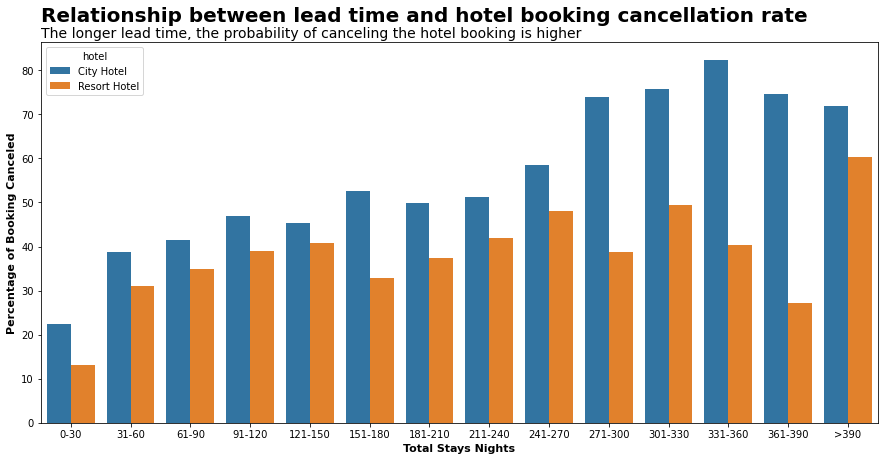

In [29]:
fig = plt.figure(figsize=(15,7))
fig.patch.set_facecolor('white')
sns.barplot(x='lead_time_group', y='cancel_percent', data=lead_group_new, hue='hotel');

plt.xlabel('Total Stays Nights', fontsize=11, fontweight='bold')
plt.ylabel('Percentage of Booking Canceled', fontsize=11, fontweight='bold')
plt.text(x=-0.5, y=91, s='Relationship between lead time and hotel booking cancellation rate', fontsize=20, fontweight='bold');
plt.text(x=-0.5, y=87.5, s='The longer lead time, the probability of canceling the hotel booking is higher', fontsize=14);